# Assignment - 1

### Due: 11:59 PM CT, September 7

---




Assignment 1

Total points: 75

Due: Thursday, September 7 submitted via Canvas by 11:59 pm

Your homework should be written in a Python notebook. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UT EID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0:

Fill out the survey posted in Canvas under Modules --> Quizzes by the same deadline as this assignment to receive a participation credit worth 5 assignment points.



# Question 1: Judgement Under Uncertainty (5 pts)

Read the article by Tversky and Kahneman (file name 'Tversky_Kahneman_1974' on Canvas under Modules) on Judgment under Uncertainty. Describe in your own words why judgments based on similarity or "representativeness" are prone to errors.


# Question 2: Google Flu Trends (10 pts)

The second article posted  in Canvas under Modules --> Resources, (google flu) describes a high-profile (and embarrassingly  failed)  project done by google, highlighting the phenomena of data drift and the importance of continually monitoring/updating models post deployment.

Read this article and then briefly describe

(i) three important causes of "data drift" in the flu prediction problem that are mentioned in the article, and

(ii) one important aspect of the original google model design that made it very prone to overfitting (and hence poor generalization on future data).


# Question 3: Maximum Likelihood Estimate (10 pts)

Assume there is a 4-sided dice, each roll of the dice can result into a possible outcome in {1, 2, 3, 4}. Suppose a random sample of 30 students of your class independently rolled the dice and their outcomes were recorded as below:
$$
[4,2,1,4,2,2,4,1,1,2,1,2,3,3,1,1,4,1,1,4,3,4,1,3,3,1,1,3,1,2]
$$
If $p_i$ refers to the probability of the dice landing on the number $i$, i.e., probability that dice lands on 1 is $p_1$, lands on 2 is $p_2$ and so on.

1. Based on these definitions, write the log-likelihood of observing the above given sequence of outcomes. (5 points) (Hint : Think multinomial distribution.)
2. Now to infer the probabilities {$p_1, p_2, p_3, p_4$} from the observed data, we need to maximize the log-likelihood for each $p_i$ individually. What (if any) is the problem with maximizing the above found log-likelihood wrt $p_i$ directly? And how can we overcome this problem? (5 points) (Hint : Think about the solutions, i.e., the values of $p_i$'s that we obtain in order to maximize the log-likelihood, and if they are correct.)

# Question 4: Linear Regression (10 pts)

1. What is the difference between R-square and adjusted R square and why is it desirable to use the adjusted value? (4 pts)

2. Overfitting usually happens in complex models. Linear Regression is a fairly simple model. Could overfitting happen in Linear Regression? If so, please explain the scenario in which it could happen and how we can tackle it. (6 pts)


# Question 5: Ridge/ Lasso Regression (35 pts)

This is a programming question. Please read through each subpart of this question carefully. You are required to add lines of code as specified in the code cells. Please carefully read through the comments in the code cells to identify what code is to be written, where it is to be written and how many lines of code are required. Code is to be added between the **## START CODE** ## and **## END CODE ##** comments and in place of the keyword **None**. In certain cases, the number of lines of code that are to be written will be specified. For example, **## START CODE ## (1 line of code)** specifies that only 1 line of code is to be added between the ## START CODE ## and ## END CODE ## comments. In case there is no information on the required number of lines, you are allowed to add any number of lines of code.

The following question covers the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. The categorical variables and rows with missing variables are removed to make it easier to run the models.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity (this feature has been removed from the csv file since it is an ordinal variable)

NOTE
* Only use the following code block if you are using Google Colab. If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
* It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

In [ ]:
from google.colab import files
uploaded = files.upload()

Imports required

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None

df = pd.read_csv("housing_data.csv")
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']

In [2]:
# Show you all the columns in this file
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [3]:
# Show you the first 5 rows in this file
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Part-1: *(2 pts)*

Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50.

In [4]:
##  START CODE  ## (1 line of code)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
##  END CODE    ##

Scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this.

In [5]:
##  START CODE  ## (2 lines of code)
Xscaled_train = StandardScaler().fit_transform(X_train)
Xscaled_test = StandardScaler().fit_transform(X_test)
##  END CODE    ##

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Print the first 5 rows of the training set after scaling

In [6]:
##  START CODE  ##
Xscaled_train_df = pd.DataFrame(Xscaled_train, columns = list(X))
Xscaled_train_df.head()
##  END CODE    ##

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.131137,1.910919,1.852903,-0.978590,-1.042943,-0.994072,-1.051209,-1.222289
1,-1.126150,0.766393,-0.926203,0.199464,0.168770,0.548454,0.278543,0.717610
2,0.708890,-0.700469,1.852903,-1.024236,-1.002233,-0.949205,-1.037964,-1.181624
3,-1.215908,0.621575,1.138276,-0.213200,-0.063515,-0.189159,-0.087006,-0.696874
4,0.863472,-0.709812,-0.290979,0.387584,0.072983,0.272074,0.103715,0.513388


Select any two variables. See how their histograms and scatterplots compare before and after scaling.

Text(0.5, 0, 'Households Scaled')

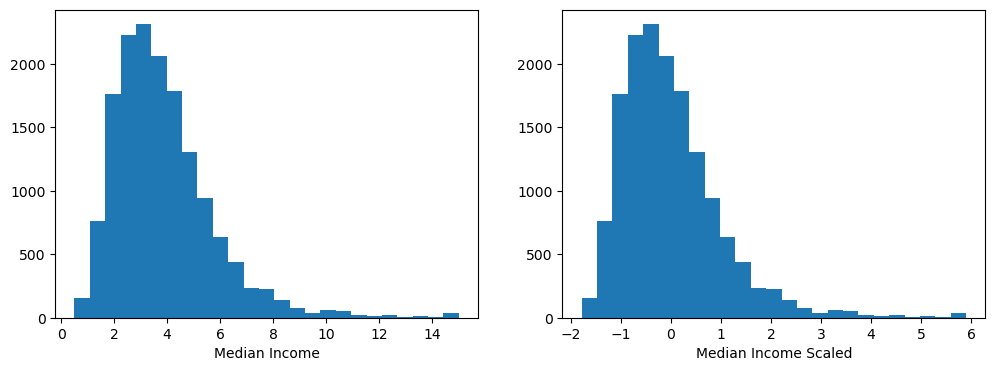

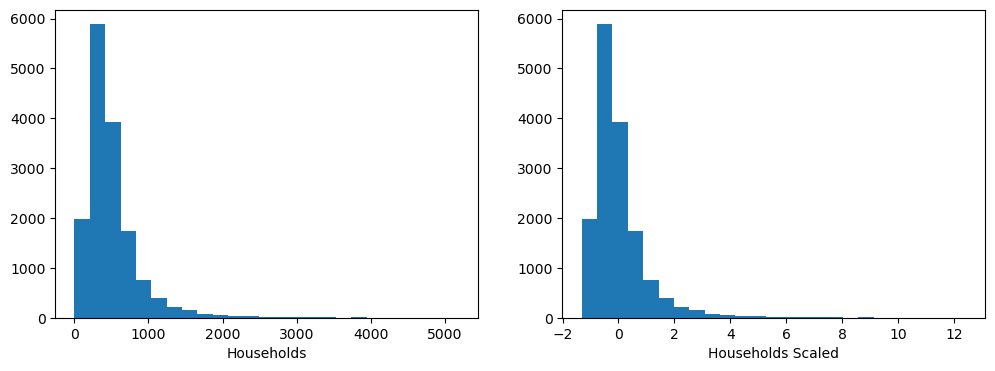

In [7]:
##  START CODE  ##

#Median Income Histogram 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(X_train['median_income'], bins=25)
plt.xlabel('Median Income')
#Scaled Median Income Histogram
plt.subplot(1, 2, 2)
plt.hist(Xscaled_train_df['median_income'], bins=25)
plt.xlabel('Median Income Scaled')

#Households Plot 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(X_train['households'], bins=25)
plt.xlabel('Households')
#Scaled Households Plot
plt.subplot(1, 2, 2)
plt.hist(Xscaled_train_df['households'], bins=25)
plt.xlabel('Households Scaled')


Text(0.5, 0, 'Scaled Households')

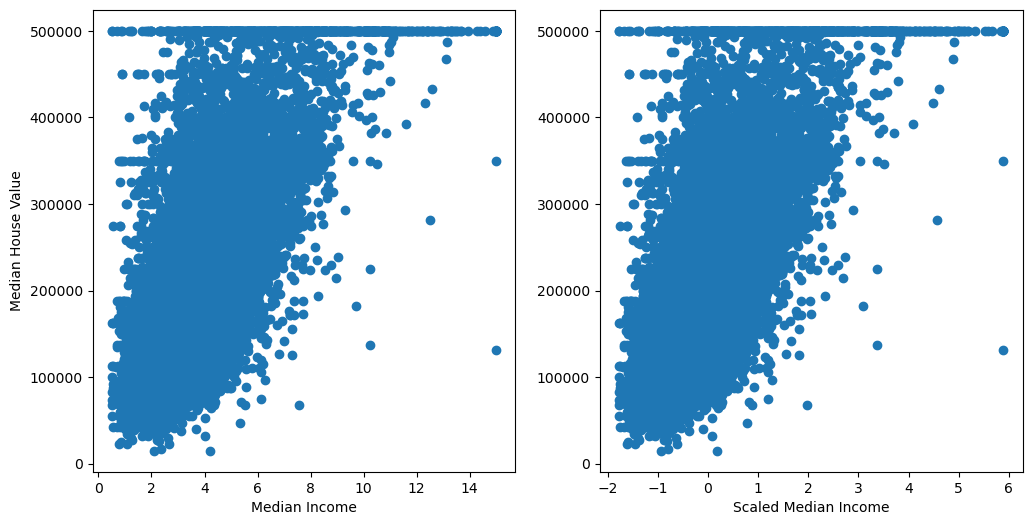

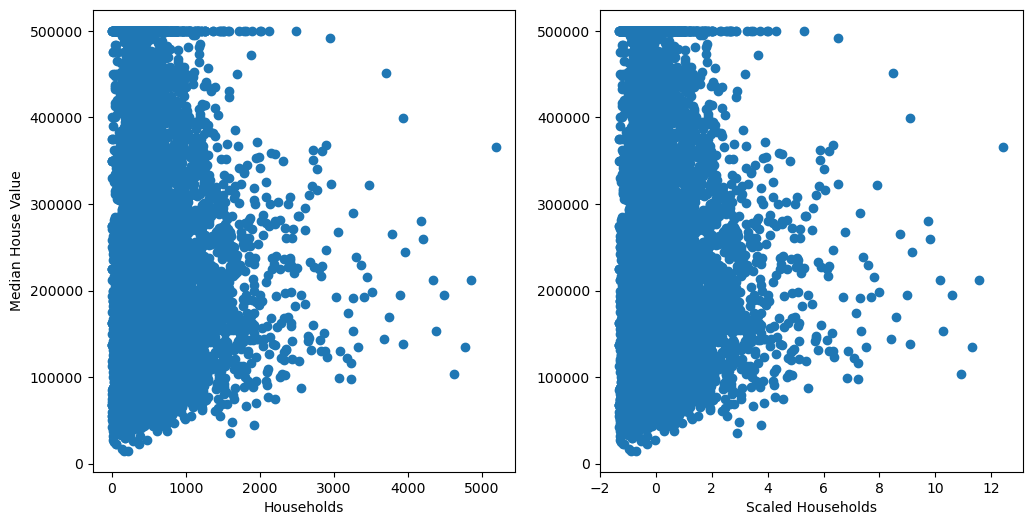

In [8]:
#Median Income vs Scatterplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['median_income'], y_train)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
#Scaled Median Income Histogram
#plt.figure(figsize=(6,3))
plt.subplot(1, 2, 2)
plt.scatter(Xscaled_train_df['median_income'], y_train)
plt.xlabel('Scaled Median Income')


#Median Income vs Scatterplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['households'], y_train)
plt.xlabel('Households')
plt.ylabel('Median House Value')
#Scaled Median Income Histogram
#plt.figure(figsize=(6,3))
plt.subplot(1, 2, 2)
plt.scatter(Xscaled_train_df['households'], y_train)
plt.xlabel('Scaled Households')
##  END CODE    ##

> *The plots look the same, only the x-axis is different due to the scaling*

## Part-2: *(5 pts)*

Use `sklearn.linear_model.Lasso` and `sklearn.linear_model.Ridge` classes to do a 5-fold cross validation using sklearn's `KFold`. For the sweep of the regularization parameter, we will look at a grid of values ranging from  $\alpha=10^{-6}$  to  $\alpha=10^{6}$.In Python, you can consider this range of values as follows: `alpha = 10**numpy.linspace(-6, 6, 100)` so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models (Lasso and Ridge) with scaled data and report the best chosen $\alpha$ based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric.

In [9]:
# Define number of folds
##  START CODE  ## (1 line of code)
n_folds = 5
##  END CODE  ##


In [10]:
# Create KFold from sklearn
##  START CODE  ## (1 line of code)
k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
##  END CODE    ##


In [11]:
#Define the alphas as defined in the question
##  START CODE  ## (1 line of code)
alphas = 10**np.linspace(-6, 6, 100)
##  END CODE    ##

lasso_avg_mse = {}
ridge_avg_mse = {}

In [12]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a lasso model with the current alpha
  ##  START CODE  ## (1 line of code)
  lasso = linear_model.Lasso(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0

  for k, (train, test) in enumerate(k_fold.split(Xscaled_train, y_train)):

    #Fit the scaled training data to the lasso model
    ## START CODE ## (1 line of code)
    lasso.fit(Xscaled_train[train], y_train[train])
    ## END CODE ##

    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    avg_mse += mean_squared_error(y_train[test], lasso.predict(Xscaled_train[test]))
    ##  END CODE    ##

  # Take the average mean squared error as metric
  lasso_avg_mse[alpha] = avg_mse / n_folds

In [13]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_lasso = min(lasso_avg_mse, key=lasso_avg_mse.get)
##  END CODE    ##

print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 57.223676593502205


In [14]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a ridge model with the current alpha
  ##  START CODE  ## (1 line of code)
  ridge = linear_model.Ridge(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0

  for k, (train, test) in enumerate(k_fold.split(Xscaled_train, y_train)):

    #Fit the scaled training data to the ridge model
    ## START CODE ## (1 line of code)
    ridge.fit(Xscaled_train[train], y_train[train])
    ## END CODE ##

    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    avg_mse += mean_squared_error(y_train[test], ridge.predict(Xscaled_train[test]))
    ##  END CODE    ##

  # Take the average mean squared error as metric
  ridge_avg_mse[alpha] = avg_mse / n_folds

In [15]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_ridge = min(lasso_avg_mse, key=ridge_avg_mse.get)
##  END CODE    ##

print("Best ridge alpha: {}".format(best_alpha_ridge))

Best ridge alpha: 14.174741629268048


## Part-3: *(7 pts)*

Run ridge and lasso regression for all of the $\alpha$ specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors.

In [51]:
# Lasso Regression

alphas = 10**np.linspace(6,-6,100)

lasso = linear_model.Lasso(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the lasso model
  ## START CODE ## (1 line of code)
  lasso = linear_model.Lasso(alpha=a)
  ## END CODE ##

  #Fit the training data to the lasso model
  ## START CODE ## (1 line of code)
  lasso.fit(Xscaled_train[train], y_train[train])
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(lasso.coef_)
  ## END CODE ##

(0.0, 100000.0)

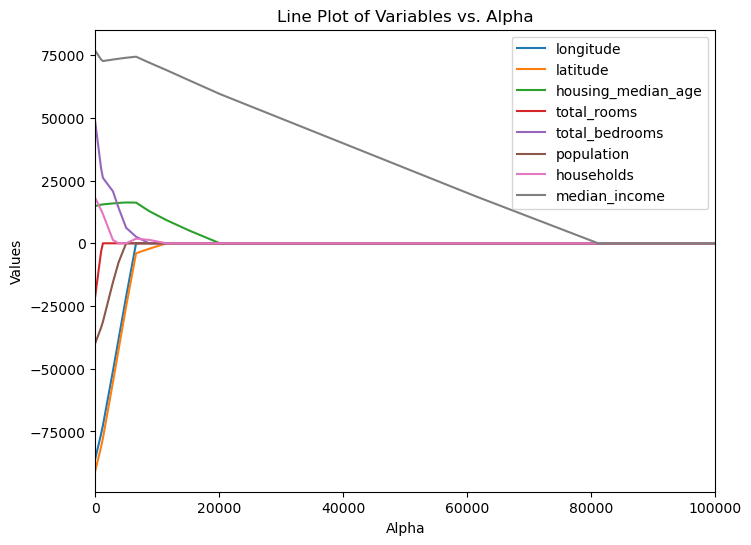

In [52]:
# Write the code to make the plot for coefficients learned from lasso
## START CODE ##
coefs_df = pd.DataFrame(coefs, columns = list(X))
coefs_df['alpha'] = alphas
coefs_df

# Extract the alpha values and other variables
alpha_values = coefs_df['alpha']
other_variables = coefs_df.drop(columns=['alpha'])

# Create a line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
for column in other_variables.columns:
    plt.plot(alpha_values, other_variables[column], label=column)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('Values')
plt.title('Line Plot of Variables vs. Alpha')
plt.legend()
plt.xlim(0, 100000)

## END CODE ##

In [53]:
# Ridge Regression

alphas = 10**np.linspace(6,-6,100)

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the ridge model
  ## START CODE ## (1 line of code)
  ridge = linear_model.Ridge(alpha=a)
  ## END CODE ##

  #Fit the training data to the ridge model
  ## START CODE ## (1 line of code)
  ridge.fit(Xscaled_train[train], y_train[train])
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ridge.coef_)
  ## END CODE ##

(0.0, 1000000.0)

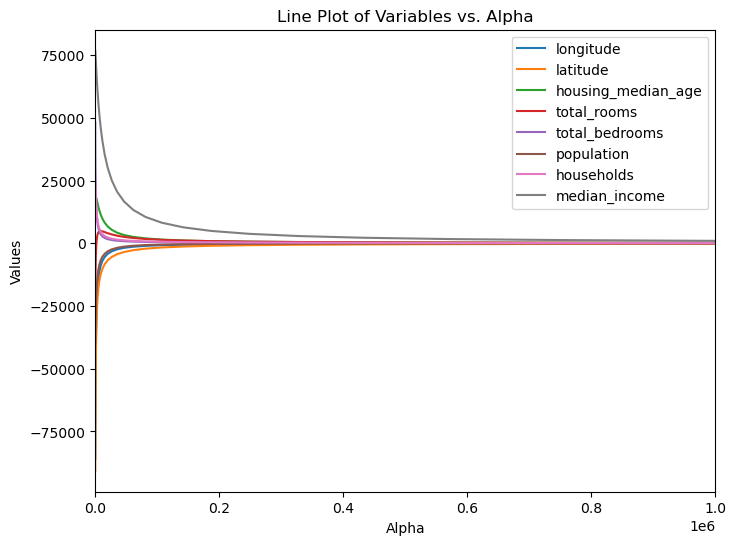

In [55]:
# Write the code to make the plot for coefficients learned from ridge
## START CODE ##
coefs_df = pd.DataFrame(coefs, columns = list(X))
coefs_df['alpha'] = alphas
coefs_df

# Extract the alpha values and other variables
alpha_values = coefs_df['alpha']
other_variables = coefs_df.drop(columns=['alpha'])

# Create a line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
for column in other_variables.columns:
    plt.plot(alpha_values, other_variables[column], label=column)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('Values')
plt.title('Line Plot of Variables vs. Alpha')
plt.legend()
plt.xlim(0, 1000000)
## END CODE ##

What do you qualitatively observe when the value of the regularization parameter changes?

> *As the regularization parameter increases, the values of the coefficients approach 0.*

## Part-4: *(5 pts)*

Similarly, use `sklearn.linear_model.ElasticNet` to do linear regression with different $\alpha$ values, and plot the coefficients learned for each of them

In [58]:
# Ridge Regression

alphas = 10**np.linspace(6,-6,100)

ElastNet = linear_model.ElasticNet(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the ElasticNet model
  ## START CODE ## (1 line of code)
  ElastNet = linear_model.ElasticNet(alpha=a)
  ## END CODE ##

  #Fit the training data to the ElasticNet model
  ## START CODE ## (1 line of code)
  ElastNet.fit(Xscaled_train[train], y_train[train])
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ElastNet.coef_)
  ## END CODE ##

(0.0, 500.0)

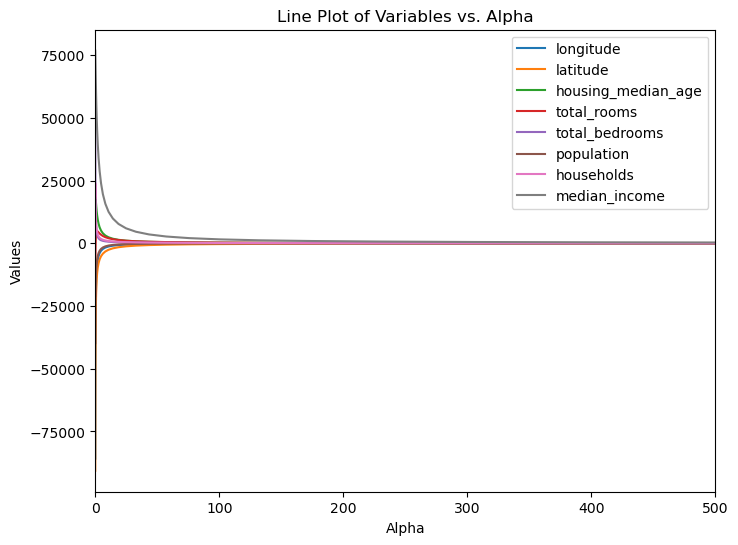

In [63]:
# Write the code to make the plot for coefficients learned from ElasticNet
## START CODE ##
coefs_df = pd.DataFrame(coefs, columns = list(X))
coefs_df['alpha'] = alphas
coefs_df

# Extract the alpha values and other variables
alpha_values = coefs_df['alpha']
other_variables = coefs_df.drop(columns=['alpha'])

# Create a line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
for column in other_variables.columns:
    plt.plot(alpha_values, other_variables[column], label=column)

# Add labels and legend
plt.xlabel('Alpha')
plt.ylabel('Values')
plt.title('Line Plot of Variables vs. Alpha')
plt.legend()
plt.xlim(0, 500)
## END CODE ##

Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models.

> *Lasso Regression allows for the elimination of irrelevant features from the model. However, it does not stabilize coefficients (it eliminated variables instead). Ridge Regression does not eliminate variables but it can stabilize coefficients. Depending on computational resources available along with the number of parameters and amount of data, one may be better than the other depending on the situation. Elastic Net allows for the elimination of features along with the stabilization of coefficients, combining the pros of both. However, Elastic net is more complex and requires hyperparameter tuning (can be very time consuming).*

## Part-5: *(10 pts)*

Run the following three regression models with MSE loss on the training data:

a. linear regression without regularization

b. linear regression with ridge regularization

c. linear regression with lasso regularization


For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

In [ ]:
## START CODE ##

## END CODE ##

## Part-6: *(3 pts)*

Train the 3 models and report metrics with the original data without scaling

In [ ]:
##  START CODE  ##

##  END CODE    ##

## Part-7: *(3 pts)*

Why is it advisable to scale the independent variables when applying ridge or  lasso regression?